This notebook will give an example of how to access the data and plot boxes over annotated pages.

In [14]:
data_file = './paper1_boxes.json' # where is datafile stored?

save_dir = './' # where to save downloaded PDFs/images

In [29]:
# colors for each type of annotation
colors = {'figure':(255,0,0), 'figure caption':(125,125,0), 
          'math formula':(0,255,0), 'table':(0,0,255)}

In [33]:
import requests
import pandas as pd
import wget
from PIL import Image
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

from data_utils import save_pages

In [4]:
df = pd.read_json(data_file)

In [5]:
df.head()

pdf link  \
0  http://articles.adsabs.harvard.edu/cgi-bin/nph...   
1  http://articles.adsabs.harvard.edu/cgi-bin/nph...   
2  http://articles.adsabs.harvard.edu/cgi-bin/nph...   
3  http://articles.adsabs.harvard.edu/cgi-bin/nph...   
4  http://articles.adsabs.harvard.edu/cgi-bin/nph...   

                                          true boxes  page number  split  
0  [[0.08984375, 0.880859375, 0.501953125, 0.9238...            2  train  
1  [[0.11523437500000001, 0.79296875, 0.906250000...            9  train  
2  [[0.15625, 0.212890625, 0.2578125, 0.85546875,...           10  train  
3  [[0.0703125, 0.798828125, 0.9316406250000001, ...            2  train  
4  [[0.740234375, 0.283203125, 0.783203125, 0.666...           14  train

For this example, we will just pick a row number from the dataframe above:

In [8]:
iexample = 1

PDFlink = df['pdf link'].values[iexample]
page_num = df['page number'].values[iexample]
true_box = df['true boxes'].values[iexample]
PDFlink, page_num, true_box

('http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1987AJ.....94..671B&defaultprint=YES&filetype=.pdf',
 9,
 [[0.11523437500000001,
   0.79296875,
   0.9062500000000001,
   0.853515625,
   'figure caption'],
  [0.10546875, 0.103515625, 0.9121093750000001, 0.77734375, 'figure']])

Download the PDF to generate a page from later:

In [23]:
page = requests.get(PDFlink)
if page.status_code == 200: # do we have this particular page we are looking for?
    filename = wget.download(PDFlink, out=save_dir) # save the file somewhere
    print('downloaded to', filename)

-1 / unknowndownloaded to /Users/jnaiman/Downloads/tmp/image_files//1987AJ_____94__671B.pdf


Make a PNG image for the specific page to plot/train with:

In [24]:
# debug
from importlib import reload
import data_utils
reload(data_utils)
from data_utils import save_pages

In [25]:
ender = 'png' # change to JPG or other for different data type

page_errors = save_pages(filename, # formatting hullaballo 
           [page_num],save_dir, 
          save_fmt = ender, 
          return_error=True)

Where is this created image file stored?

In [26]:
image_file_name = filename.split('.pdf')[0] + '_p' + str(page_num) + '.' + ender
image_file_name

'/Users/jnaiman/Downloads/tmp/image_files//1987AJ_____94__671B_p9.png'

Now open image and plot:

In [28]:
# open
img = np.array(Image.open(image_file_name).convert('RGB'))
img.shape

(3168, 2448, 3)

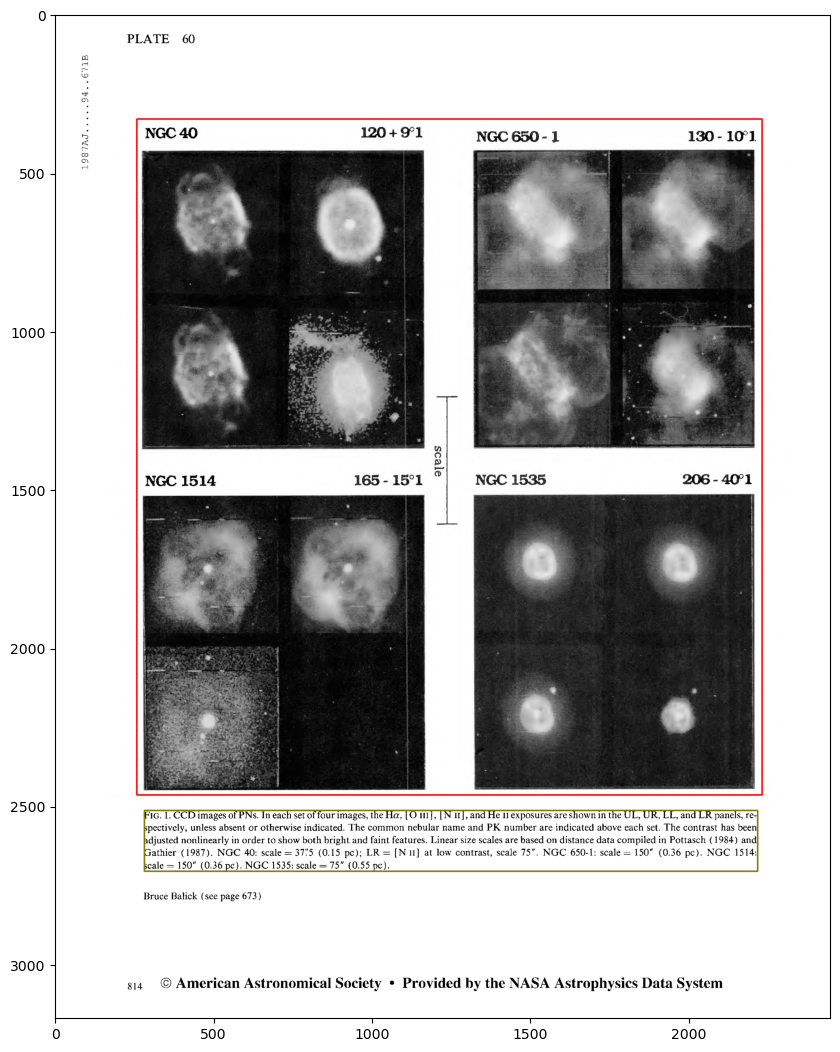

In [34]:
imgPlot = img.copy()
for xmin,ymin,xmax,ymax,label in true_box:
    xmin = round(xmin*img.shape[1])
    xmax = round(xmax*img.shape[1])
    ymin = round(ymin*img.shape[0])
    ymax = round(ymax*img.shape[0])
    #print((xmin,ymin), (xmax,ymax))
    cv.rectangle(imgPlot, (xmin,ymin), (xmax,ymax), colors[label], 3)

fig, ax = plt.subplots(figsize=(10,30))

ax.imshow(imgPlot)

plt.show()